In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Using TensorFlow backend.












Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 

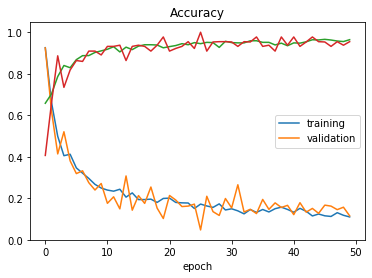

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 11 14:18:06 2019

@author: Sanjeev Jha
"""

from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Input
from keras.optimizers import SGD, Adam,RMSprop
import cv2, numpy as np
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Model
import matplotlib.pyplot as plt
np.random.seed(0)
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg19 import preprocess_input
from keras.models import load_model
import cv2
import numpy as np
from keras import backend as K
#K.set_image_dim_ordering("th")
"""
ISSUE: Keras MaxPooling2D gives ValueError: Negative dimension size caused by subtracting 2 from 1 for 'MaxPool_x'
url:https://github.com/keras-team/keras/issues/3945
solution: model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th")) 
"""
"""
alpha. Also referred to as the learning rate or step size. The proportion that weights are updated (e.g. 0.001). 
Larger values (e.g. 0.3) results in faster initial learning before the rate is updated. Smaller values (e.g. 1.0E-5) 
slow learning right down during training
beta1. The exponential decay rate for the first moment estimates (e.g. 0.9).
beta2. The exponential decay rate for the second-moment estimates (e.g. 0.999). 
This value should be set close to 1.0 on problems with a sparse gradient (e.g. NLP and computer vision problems).
epsilon. Is a very small number to prevent any division by zero in the implementation (e.g. 10E-8).
Further, learning rate decay can also be used with Adam. The paper uses a decay rate alpha = alpha/sqrt(t) updted each epoch (t) for the logistic regression demonstration.
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
The Adam paper suggests:
"""

"""
TensorFlow: learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08.
Keras: lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0.
"""
"""
Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models.
Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm 
that can handle sparse gradients on noisy problems.
Adam is relatively easy to configure where the default configuration parameters do well on most problems.
"""
num_classes=3

if __name__ == "__main__":  
    net = VGG16(weights='imagenet') 
    net.layers.pop()
    model=Sequential()
    #net.trainable = False
    for l in net.layers:
      model.add(l)
      l.trainable = False
     
    for m in model.layers:
       m.trainable=False
 
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()   
    adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=True)
    model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])
   
    #data augementation
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                       rotation_range = 30,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.2,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True)
 
    
                                       
    test_datagen = ImageDataGenerator(rescale = 1./255)
   
    train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/FaceRecog/train_data',
                                                            target_size=(224,224),
                                                            color_mode='rgb',
                                                            batch_size=32,
                                                            class_mode='categorical',
                                                            interpolation='nearest',
                                                            shuffle=True)
    
    test_generator = test_datagen.flow_from_directory('/content/drive/My Drive/FaceRecog/test_data',
                                                          target_size=(224,224),
                                                          color_mode='rgb',
                                                          batch_size=32,
                                                          class_mode='categorical',
                                                          interpolation='nearest',
                                                          shuffle=True)

    steps_per_epoch=train_generator.n
    batch_size_train=train_generator.batch_size
    step_size_train=int(steps_per_epoch/batch_size_train)
    validation_steps=test_generator.n
    batch_size_test=test_generator.batch_size
    step_size_test=int(validation_steps/batch_size_test)

    
    history = model.fit_generator(train_generator,steps_per_epoch=step_size_train,epochs=50,validation_data=test_generator,validation_steps=step_size_test, verbose=1)
    model.save("Image_Classifier_VGG16_03_50_E50.h5")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'])
    plt.title('Loss')
    plt.xlabel('epoch')
     
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['training','validation'])
    plt.title('Accuracy')
    plt.xlabel('epoch')
   

In [43]:


#model = load_model('Image_Classifier_VGG16_03_50_E50.h5')

#model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])

img = cv2.imread('/content/drive/My Drive/FaceRecog/7.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

classes = model.predict_classes(img)
score=model.predict(img)
print(classes)
print(score)

[0]
[[9.9999917e-01 8.8229399e-07 1.6975240e-14]]


In [44]:
img_path = '/content/drive/My Drive/FaceRecog/7.jpg'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

classes = model.predict_classes(x)
score=model.predict(x)
print(classes)
print(score)

[0]
[[9.9999881e-01 1.2459863e-06 1.9344398e-18]]
